# Métricas para el análisis de redes 

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
SEMILLA_ALEATORIEDAD = 123
np.random.seed(SEMILLA_ALEATORIEDAD)

In [2]:
floren_graph = nx.florentine_families_graph()
karate_graph = nx.karate_club_graph()

In [3]:
df_congress = pd.read_csv('congress_network\congress.csv', delimiter=';')
congress_graph = nx.DiGraph()
for index, row in df_congress.iterrows():
    congress_graph.add_edge(row['Source'], row['Target'], weight=row['Weight'])

print("Nodos: ", congress_graph.number_of_nodes())
print("Aristas con pesos: ", congress_graph.number_of_edges())

Nodos:  475
Aristas con pesos:  13289


# Distribuciones de grado

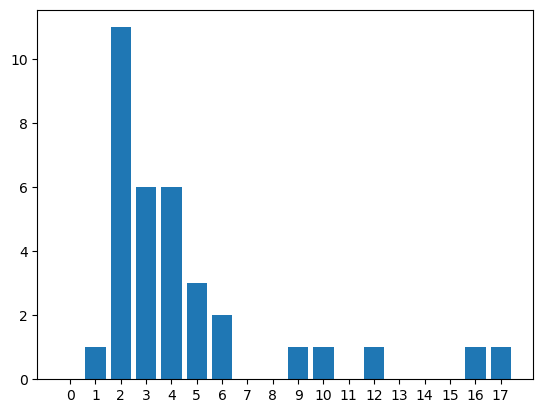

In [5]:
dh_karate = nx.degree_histogram(karate_graph)
height = dh_karate
bars = range(len(dh_karate))
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

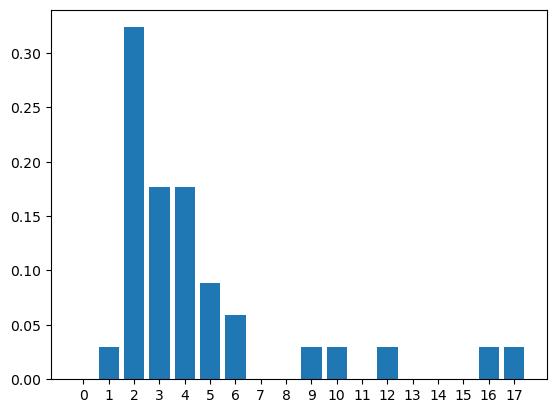

In [6]:
dh_karate_prob = [elem / karate_graph.number_of_nodes() for elem in dh_karate]
height = dh_karate_prob
bars = range(len(dh_karate_prob))
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

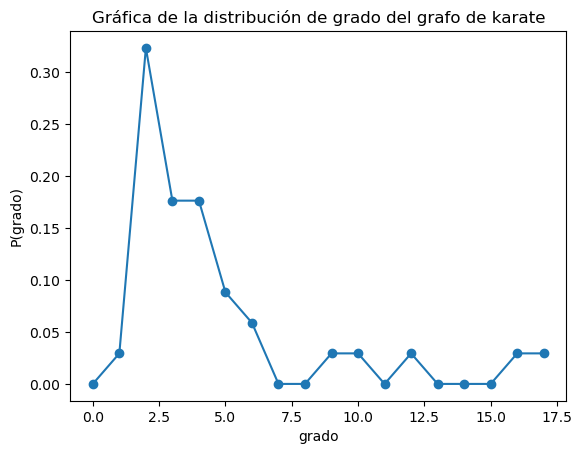

In [7]:
fig, ax = plt.subplots()
plt.plot(range(len(dh_karate_prob)), dh_karate_prob, "o-")
plt.title("Gráfica de la distribución de grado del grafo de karate")
plt.xlabel("grado")
plt.ylabel("P(grado)")
plt.show()

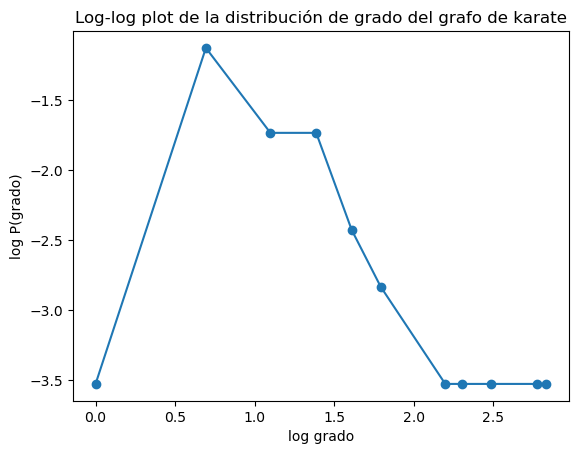

In [26]:
# Para evitar hacer el logaritmo de 0, omitimos los grados en los que esto ocurra
log_d = []
log_p_d = []
i = 0
for d in range(len(dh_karate_prob)):
    if dh_karate_prob[d] != 0:
        log_d.append(np.log(d))
        log_p_d.append(np.log(dh_karate_prob[d]))
        i+=1

fig, ax = plt.subplots()
plt.plot(log_d, log_p_d, "o-")
plt.title("Log-log plot de la distribución de grado del grafo de karate")
plt.xlabel("log grado")
plt.ylabel("log P(grado)")
plt.show()

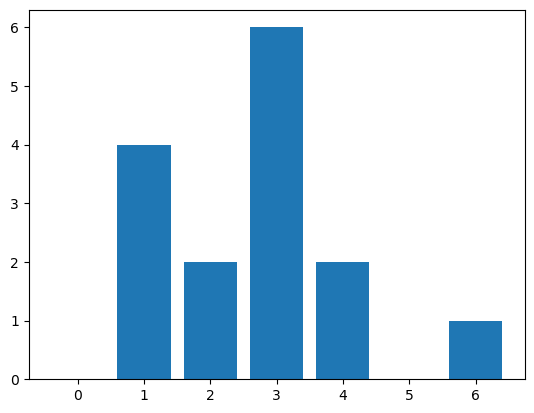

In [9]:
dh_floren = nx.degree_histogram(floren_graph)
height = dh_floren
bars = range(len(dh_floren))
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

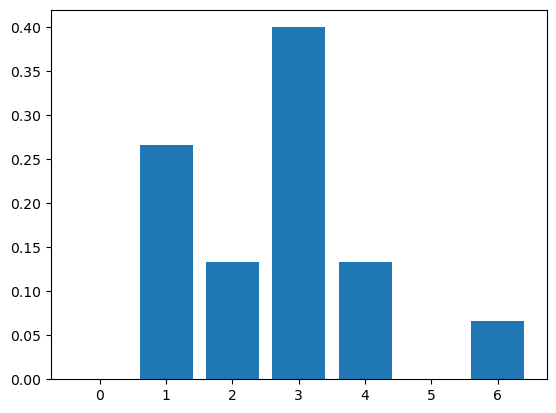

In [10]:
dh_floren_prob = [elem / floren_graph.number_of_nodes() for elem in dh_floren]
height = dh_floren_prob
bars = range(len(dh_floren_prob))
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

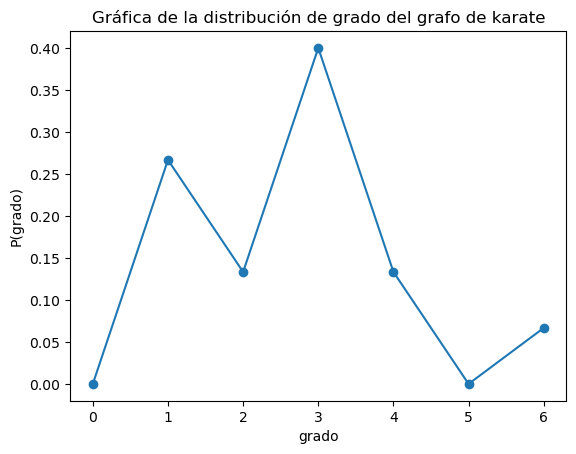

In [11]:
fig, ax = plt.subplots()
plt.plot(range(len(dh_floren_prob)), dh_floren_prob, "o-")
plt.title("Gráfica de la distribución de grado del grafo de karate")
plt.xlabel("grado")
plt.ylabel("P(grado)")
plt.show()

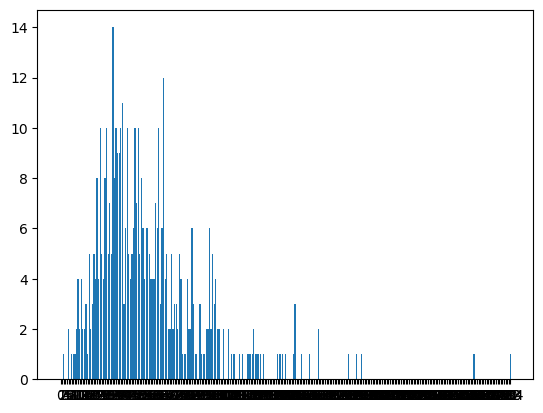

In [37]:
dh_congress = nx.degree_histogram(congress_graph)
height = dh_congress
bars = range(len(dh_congress))
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

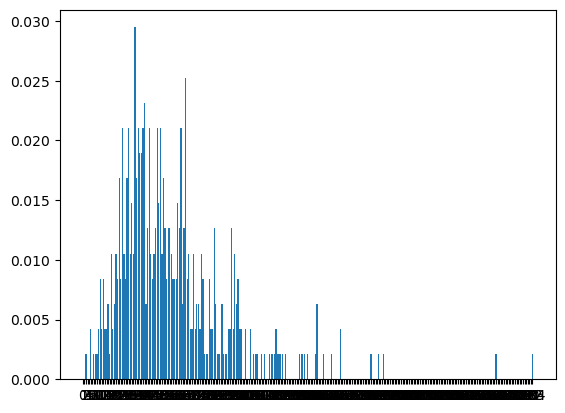

In [38]:
dh_congress_prob = [elem / congress_graph.number_of_nodes() for elem in dh_congress]
height = dh_congress_prob
bars = range(len(dh_congress_prob))
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

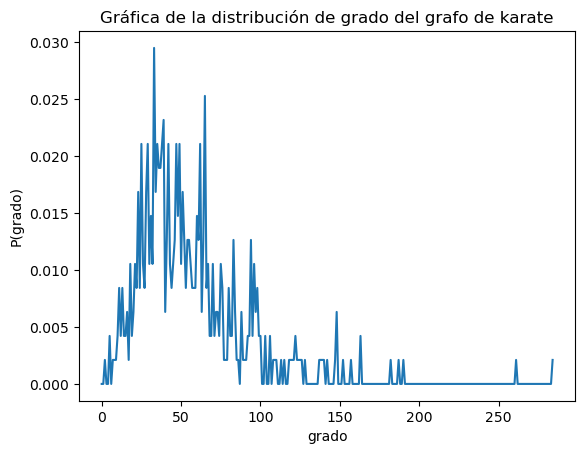

In [39]:
fig, ax = plt.subplots()
plt.plot(range(len(dh_congress_prob)), dh_congress_prob)
plt.title("Gráfica de la distribución de grado del grafo de karate")
plt.xlabel("grado")
plt.ylabel("P(grado)")
plt.show()

C:\Users\Jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frecuencia')

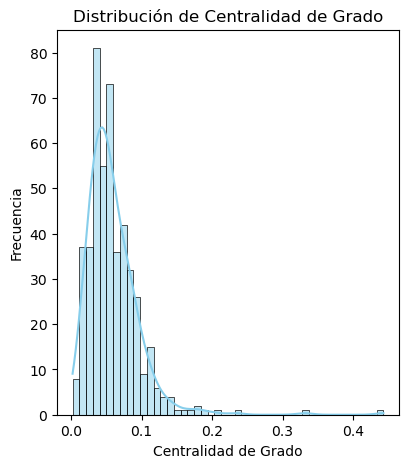

In [40]:
import seaborn as sns

degree_centrality = nx.out_degree_centrality(congress_graph)
degree_values = list(degree_centrality.values())
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5))

# Graficar la distribución de la centralidad de grado
plt.subplot(1, 3, 1)
sns.histplot(degree_values, kde=True, color='skyblue')
plt.title('Distribución de Centralidad de Grado')
plt.xlabel('Centralidad de Grado')
plt.ylabel('Frecuencia')

C:\Users\Jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

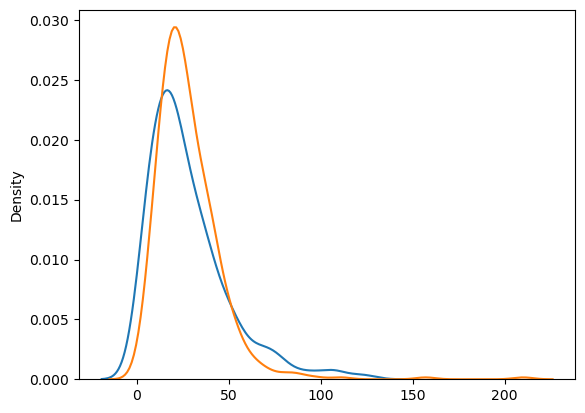

In [41]:
import seaborn as sns

# Calcular grados de entrada y salida
in_degrees = [d for n, d in congress_graph.in_degree()]
out_degrees = [d for n, d in congress_graph.out_degree()]
out_degrees

# Gráfico de densidad
sns.kdeplot(x = in_degrees)
sns.kdeplot(x = out_degrees)

In [37]:
# Función para plotear la distribución de grado
def plot_degree_distribution(degrees, title, xlabel, ylabel):
    degree_count = np.bincount(degrees)
    k = np.arange(len(degree_count))
    p_k = degree_count / sum(degree_count)

    # Filtrar grados con baja frecuencia
    #threshold = 0.0001  # Ajusta este valor según sea necesario
    #threshold = 0
    #filtered_k = k[p_k > threshold]
    #filtered_p_k = p_k[p_k > threshold]

    # Ploteo de la distribución de grado
    plt.figure(figsize=(10, 6))
    
    # Para dibujar la distribución tal cual
    plt.plot(k, p_k, "o")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()


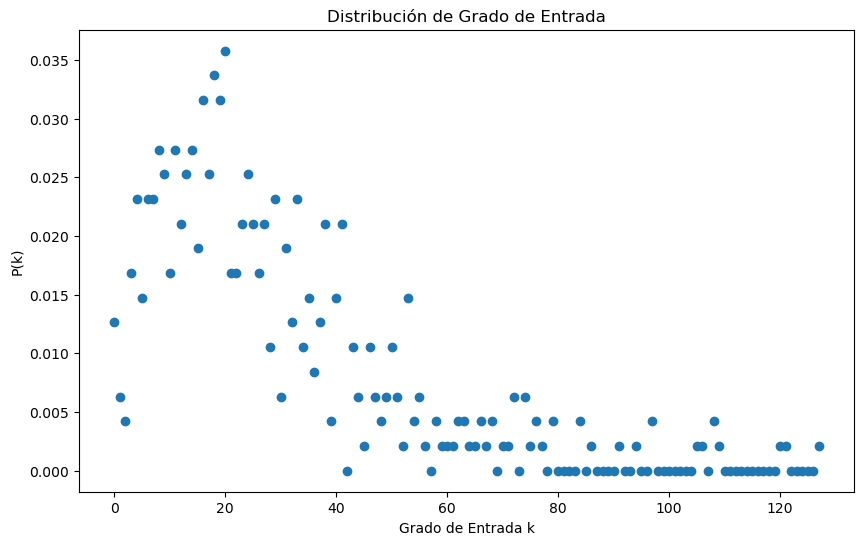

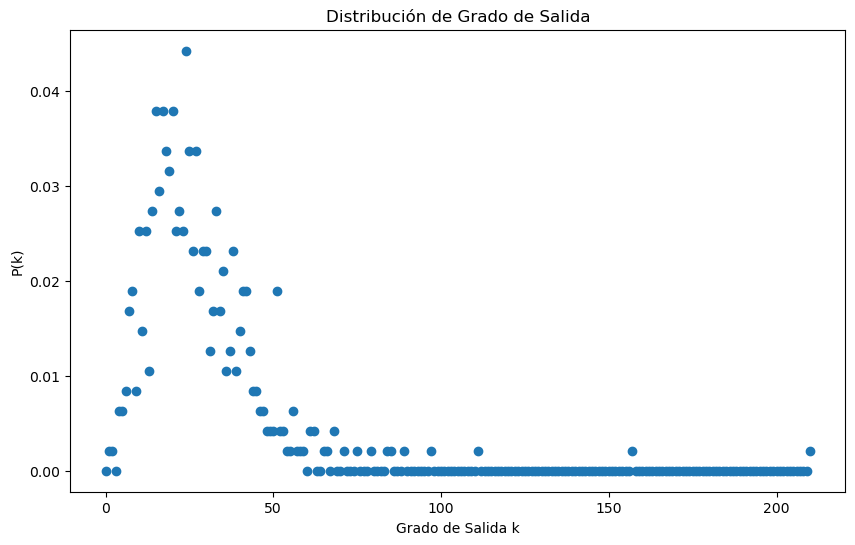

In [38]:
# Plotear distribuciones de grado de entrada y salida
plot_degree_distribution(in_degrees, 'Distribución de Grado de Entrada', 'Grado de Entrada k', 'P(k)')
plot_degree_distribution(out_degrees, 'Distribución de Grado de Salida', 'Grado de Salida k', 'P(k)')

# Calcular grados de entrada y salida
in_degrees = [d for n, d in congress_graph.in_degree()]
out_degrees = [d for n, d in congress_graph.out_degree()]

In [39]:
# Función para plotear la distribución de grado
def log_plot_degree_distribution(degrees, title, xlabel, ylabel):
    degree_count = np.bincount(degrees)
    k = np.arange(len(degree_count))
    p_k = degree_count / sum(degree_count)

    # Filtrar grados 
    threshold = 0
    filtered_k = k[p_k > threshold]
    filtered_p_k = p_k[p_k > threshold]
    
    log_k = np.log(filtered_k)
    log_p_k = np.log(filtered_p_k)
    
    # Ploteo de la distribución de grado
    plt.figure(figsize=(10, 6))
    
    # Para dibujar la distribución tal cual
    plt.plot(log_k, log_p_k, "o")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    


C:\Users\Jesus\AppData\Local\Temp\ipykernel_14200\2423843538.py:12: RuntimeWarning: divide by zero encountered in log
  log_k = np.log(filtered_k)


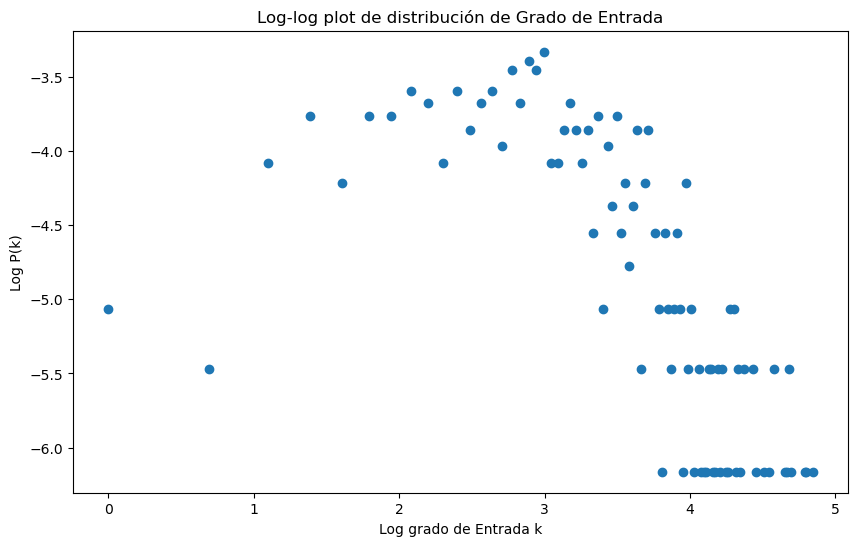

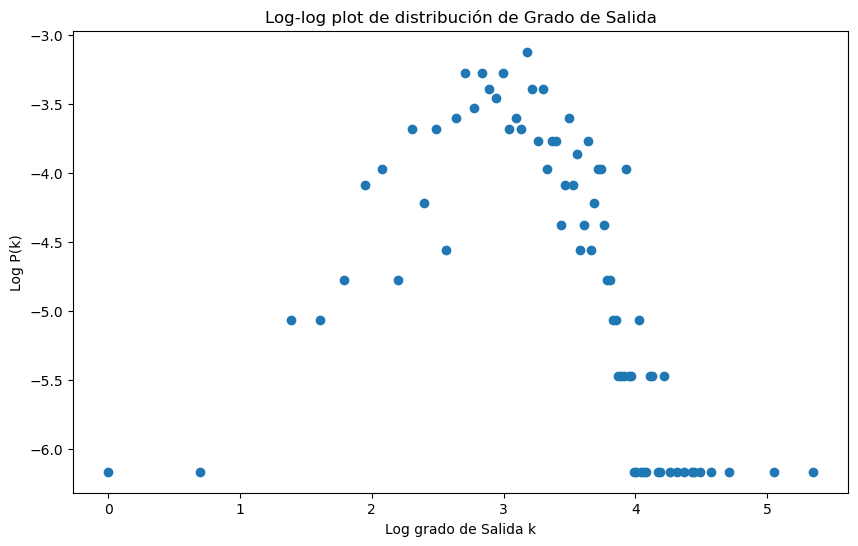

In [40]:
# Calcular grados de entrada y salida
in_degrees = [d for n, d in congress_graph.in_degree()]
out_degrees = [d for n, d in congress_graph.out_degree()]

# Plotear distribuciones de grado de entrada y salida
log_plot_degree_distribution(in_degrees, 'Log-log plot de distribución de Grado de Entrada', 'Log grado de Entrada k', 'Log P(k)')
log_plot_degree_distribution(out_degrees, 'Log-log plot de distribución de Grado de Salida', 'Log grado de Salida k', 'Log P(k)')

In [5]:
df_facebook = pd.read_csv('ego-facebook\\facebook.csv', delimiter = ';')
df_facebook

,Source,Target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [15]:
facebook_graph = nx.Graph()
for index, row in df_facebook.iterrows():
    facebook_graph.add_edge(row['Source'], row['Target'])

print("Nodos: ", facebook_graph.number_of_nodes())
print("Aristas con pesos: ", facebook_graph.number_of_edges())

Nodos:  4039
Aristas con pesos:  88234


In [16]:
fc_degrees = [d for n, d in facebook_graph.degree()]

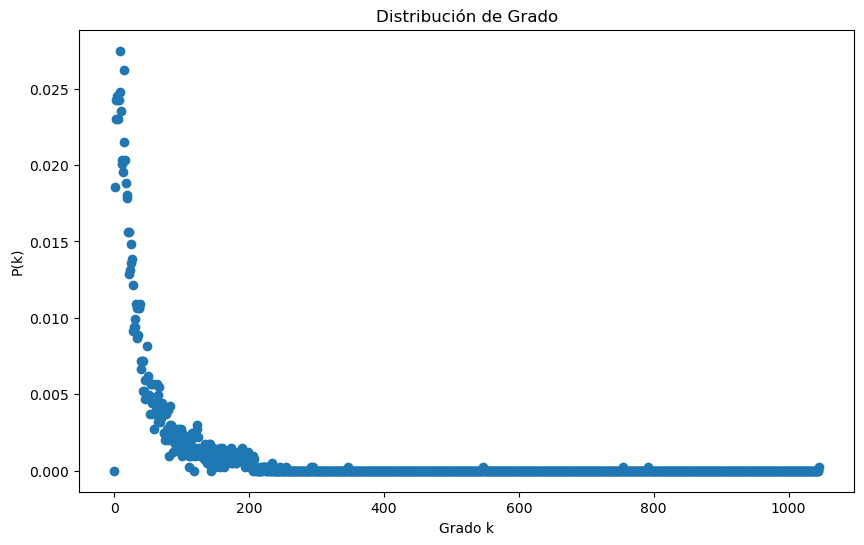

In [20]:
plot_degree_distribution(fc_degrees, 'Distribución de Grado', 'Grado k', 'P(k)')

C:\Users\Jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

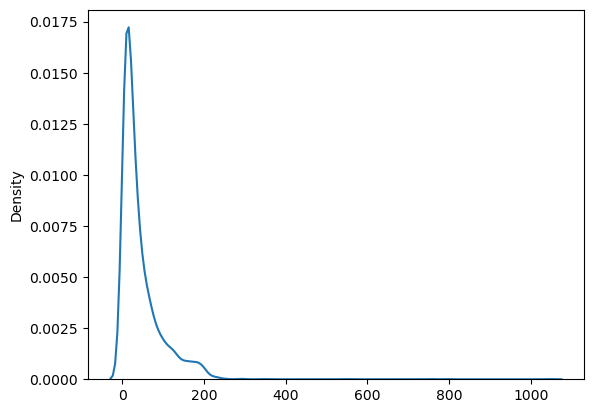

In [34]:
import seaborn as sns

sns.kdeplot(x = fc_degrees)

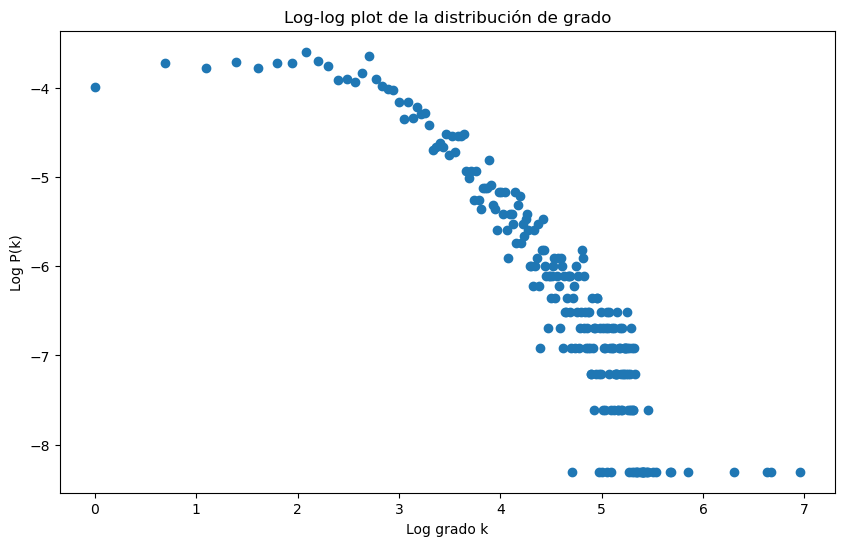

In [114]:
# Plotear distribuciones de grado de entrada y salida
log_plot_degree_distribution(fc_degrees, 'Log-log plot de la distribución de grado', 'Log grado k', 'Log P(k)')

# Diámetro y camino más corto

In [13]:
nx.is_strongly_connected(congress_graph)

False

In [21]:
nx.is_connected(facebook_graph)

True

In [22]:
nx.diameter(facebook_graph)

8

In [26]:
out_degrees = [d for n, d in congress_graph.out_degree()]
j=0
for i in out_degrees:
    if i == 0:
        j+=1
j

0

In [12]:
# Encontrar las componentes fuertemente conexas
sccs = list(nx.strongly_connected_components(congress_graph))

# Función para calcular el diámetro y la longitud media del camino más corto
def analyze_component(subgraph):
    if nx.is_strongly_connected(subgraph):
        diameter = nx.diameter(subgraph)
        average_shortest_path_length = nx.average_shortest_path_length(subgraph)
    else:
        diameter = "Infinito"
        average_shortest_path_length = "No definido"
    return diameter, average_shortest_path_length

# Analizar cada componente fuertemente conexa
for i, scc in enumerate(sccs):
    subgraph = congress_graph.subgraph(scc).copy()
    diameter, avg_path_length = analyze_component(subgraph)
    print(f"Componente {i+1}:")
    print(f"  Diámetro: {diameter}")
    print(f"  Longitud media del camino más corto: {avg_path_length}")
    print(f'Tamaño de la componente: {len(scc)}')

Componente 1:
  Diámetro: 6
  Longitud media del camino más corto: 2.3548922056384742
Tamaño de la componente: 469
Componente 2:
  Diámetro: 0
  Longitud media del camino más corto: 0
Tamaño de la componente: 1
Componente 3:
  Diámetro: 0
  Longitud media del camino más corto: 0
Tamaño de la componente: 1
Componente 4:
  Diámetro: 0
  Longitud media del camino más corto: 0
Tamaño de la componente: 1
Componente 5:
  Diámetro: 0
  Longitud media del camino más corto: 0
Tamaño de la componente: 1
Componente 6:
  Diámetro: 0
  Longitud media del camino más corto: 0
Tamaño de la componente: 1
Componente 7:
  Diámetro: 0
  Longitud media del camino más corto: 0
Tamaño de la componente: 1


# Clustering y cohesión

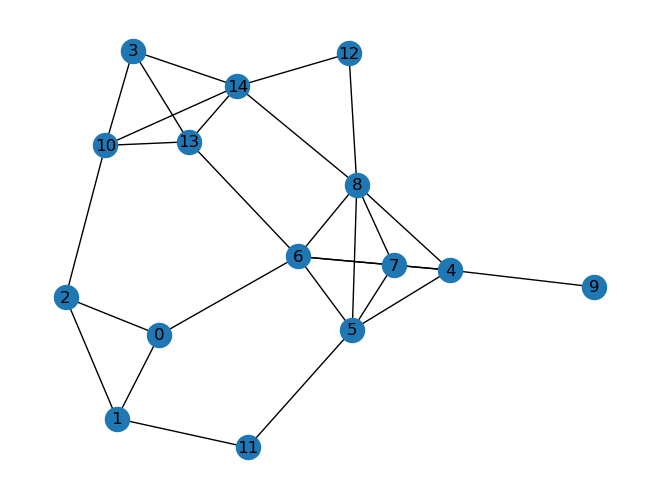

In [43]:
# Agrupa los cliques gráficamente
max_clique = nx.make_max_clique_graph(floren_graph)
nx.draw(max_clique, with_labels=True)

In [30]:
ER = nx.erdos_renyi_graph(475, 0.1)
nx.average_clustering(ER)

0.10050912946647568

In [32]:
nx.transitivity(ER)

0.10054113198558966

In [27]:
nx.average_clustering(congress_graph)

0.22422040490798673

In [28]:
nx.transitivity(congress_graph)

0.21166932349342485

# Centralidad

## Por grado

In [7]:
floren_degree_centrality = nx.degree_centrality(floren_graph)
floren_degree_centrality

{'Acciaiuoli': 0.07142857142857142,
 'Medici': 0.42857142857142855,
 'Castellani': 0.21428571428571427,
 'Peruzzi': 0.21428571428571427,
 'Strozzi': 0.2857142857142857,
 'Barbadori': 0.14285714285714285,
 'Ridolfi': 0.21428571428571427,
 'Tornabuoni': 0.21428571428571427,
 'Albizzi': 0.21428571428571427,
 'Salviati': 0.14285714285714285,
 'Pazzi': 0.07142857142857142,
 'Bischeri': 0.21428571428571427,
 'Guadagni': 0.2857142857142857,
 'Ginori': 0.07142857142857142,
 'Lamberteschi': 0.07142857142857142}

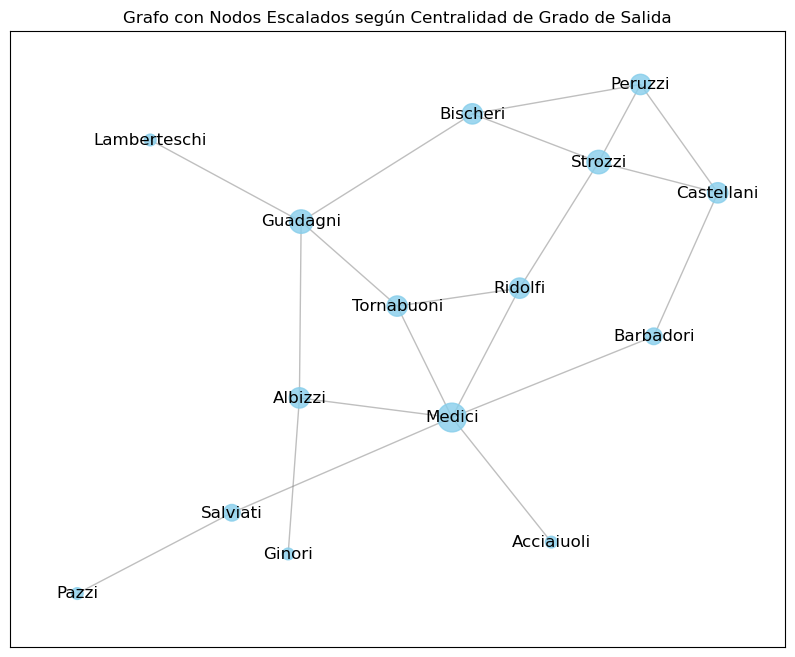

In [11]:
# Dibujar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(floren_graph)  # Elegir un layout para el grafo

# Escalar los valores de centralidad para usarlos como tamaños de nodo
node_sizes = [1000 * floren_degree_centrality[node] for node in floren_graph.nodes()]

# Dibujar nodos y aristas
nx.draw_networkx_nodes(floren_graph, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(floren_graph, pos, edgelist=floren_graph.edges(), edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(floren_graph, pos, font_size=12, font_color='black')

# Título y mostrar gráfico
plt.title('Grafo con Nodos Escalados según Centralidad de Grado')
plt.show()

C:\Users\Jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frecuencia')

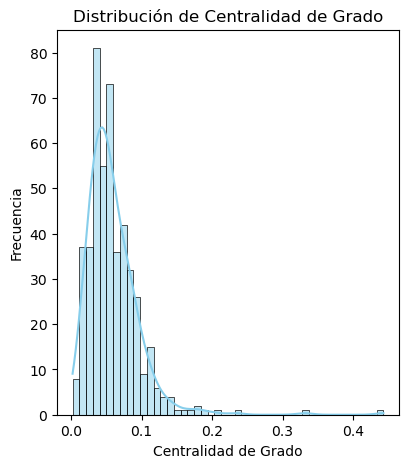

In [19]:
import seaborn as sns

degree_centrality = nx.out_degree_centrality(congress_graph)
degree_values = list(degree_centrality.values())
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5))

# Graficar la distribución de la centralidad de grado
plt.subplot(1, 3, 1)
sns.histplot(degree_values, kde=True, color='skyblue')
plt.title('Distribución de Centralidad de Grado')
plt.xlabel('Centralidad de Grado')
plt.ylabel('Frecuencia')

## Por cercanía

In [41]:
floren_closeness_centrality = nx.closeness_centrality(floren_graph)
floren_closeness_centrality

{'Acciaiuoli': 0.3684210526315789,
 'Medici': 0.56,
 'Castellani': 0.3888888888888889,
 'Peruzzi': 0.3684210526315789,
 'Strozzi': 0.4375,
 'Barbadori': 0.4375,
 'Ridolfi': 0.5,
 'Tornabuoni': 0.4827586206896552,
 'Albizzi': 0.4827586206896552,
 'Salviati': 0.3888888888888889,
 'Pazzi': 0.2857142857142857,
 'Bischeri': 0.4,
 'Guadagni': 0.4666666666666667,
 'Ginori': 0.3333333333333333,
 'Lamberteschi': 0.32558139534883723}

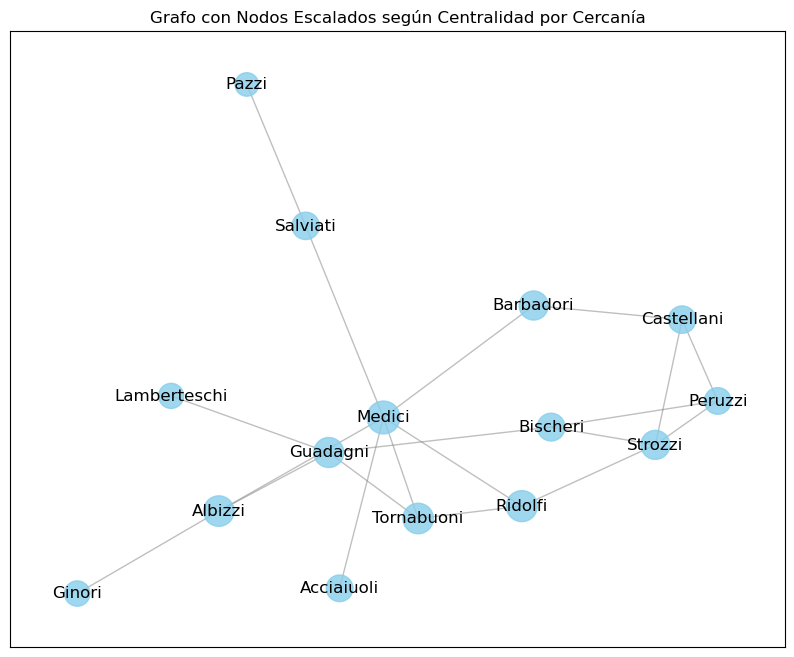

In [42]:
# Dibujar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(floren_graph)  # Elegir un layout para el grafo

# Escalar los valores de centralidad para usarlos como tamaños de nodo
node_sizes = [1000 * floren_closeness_centrality[node] for node in floren_graph.nodes()]

# Dibujar nodos y aristas
nx.draw_networkx_nodes(floren_graph, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(floren_graph, pos, edgelist=floren_graph.edges(), edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(floren_graph, pos, font_size=12, font_color='black')

# Título y mostrar gráfico
plt.title('Grafo con Nodos Escalados según Centralidad por Cercanía')
plt.show()

C:\Users\Jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frecuencia')

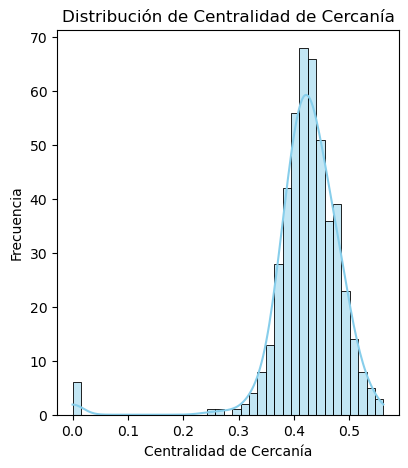

In [21]:
import seaborn as sns

closeness_centrality = nx.closeness_centrality(congress_graph)
closeness_values = list(closeness_centrality.values())
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5))

# Graficar la distribución de la centralidad de grado
plt.subplot(1, 3, 1)
sns.histplot(closeness_values, kde=True, color='skyblue')
plt.title('Distribución de Centralidad de Cercanía')
plt.xlabel('Centralidad de Cercanía')
plt.ylabel('Frecuencia')

## Por intermediación

In [15]:
floren_betweeness_centrality = nx.betweenness_centrality(floren_graph)
floren_betweeness_centrality

{'Acciaiuoli': 0.0,
 'Medici': 0.521978021978022,
 'Castellani': 0.05494505494505495,
 'Peruzzi': 0.02197802197802198,
 'Strozzi': 0.10256410256410257,
 'Barbadori': 0.09340659340659341,
 'Ridolfi': 0.11355311355311355,
 'Tornabuoni': 0.09157509157509157,
 'Albizzi': 0.21245421245421245,
 'Salviati': 0.14285714285714288,
 'Pazzi': 0.0,
 'Bischeri': 0.1043956043956044,
 'Guadagni': 0.2545787545787546,
 'Ginori': 0.0,
 'Lamberteschi': 0.0}

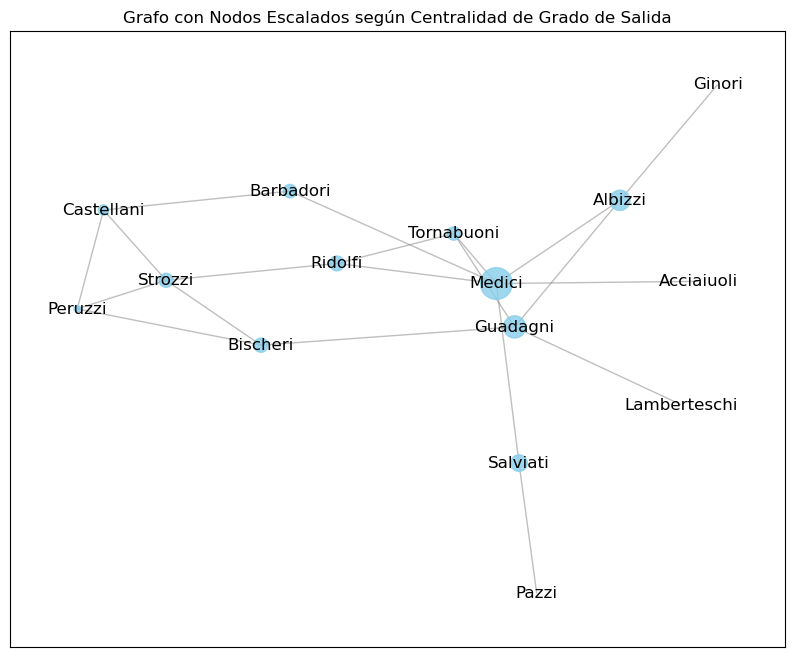

In [16]:
# Dibujar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(floren_graph)  # Elegir un layout para el grafo

# Escalar los valores de centralidad para usarlos como tamaños de nodo
node_sizes = [1000 * floren_betweeness_centrality[node] for node in floren_graph.nodes()]

# Dibujar nodos y aristas
nx.draw_networkx_nodes(floren_graph, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(floren_graph, pos, edgelist=floren_graph.edges(), edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(floren_graph, pos, font_size=12, font_color='black')

# Título y mostrar gráfico
plt.title('Grafo con Nodos Escalados según Centralidad de Intermediación')
plt.show()

C:\Users\Jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frecuencia')

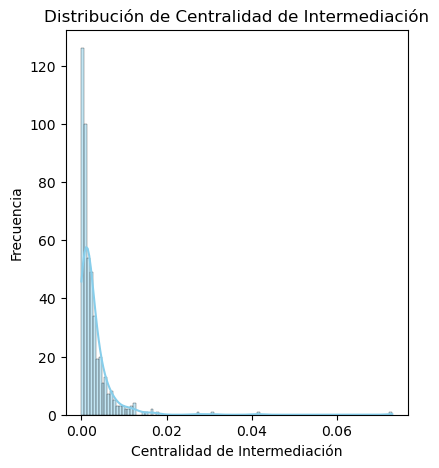

In [23]:
import seaborn as sns

betweenness_centrality = nx.betweenness_centrality(congress_graph)
betweenness_values = list(betweenness_centrality.values())
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5))

# Graficar la distribución de la centralidad de grado
plt.subplot(1, 3, 1)
sns.histplot(betweenness_values, kde=True, color='skyblue')
plt.title('Distribución de Centralidad de Intermediación')
plt.xlabel('Centralidad de Intermediación')
plt.ylabel('Frecuencia')

## Por eigenvector (prestigio y poder)

In [17]:
floren_eigen_centrality = nx.eigenvector_centrality(floren_graph)
floren_eigen_centrality

{'Acciaiuoli': 0.1321573195285342,
 'Medici': 0.43031542583499227,
 'Castellani': 0.25902003784235145,
 'Peruzzi': 0.27572243741048336,
 'Strozzi': 0.35597303264604513,
 'Barbadori': 0.2117057470647985,
 'Ridolfi': 0.34155442590743657,
 'Tornabuoni': 0.325846704169574,
 'Albizzi': 0.2439605296754477,
 'Salviati': 0.14592084164171834,
 'Pazzi': 0.04481493970386309,
 'Bischeri': 0.28279439587133565,
 'Guadagni': 0.28911715732265014,
 'Ginori': 0.07492453160277932,
 'Lamberteschi': 0.0887925311349955}

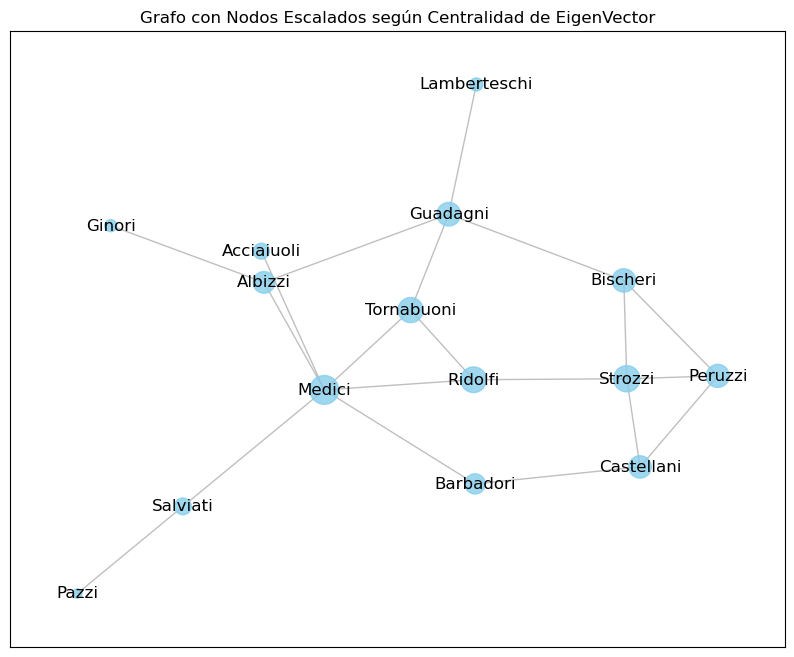

In [18]:
# Dibujar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(floren_graph)  # Elegir un layout para el grafo

# Escalar los valores de centralidad para usarlos como tamaños de nodo
node_sizes = [1000 * floren_eigen_centrality[node] for node in floren_graph.nodes()]

# Dibujar nodos y aristas
nx.draw_networkx_nodes(floren_graph, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(floren_graph, pos, edgelist=floren_graph.edges(), edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(floren_graph, pos, font_size=12, font_color='black')

# Título y mostrar gráfico
plt.title('Grafo con Nodos Escalados según Centralidad de EigenVector')
plt.show()

C:\Users\Jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frecuencia')

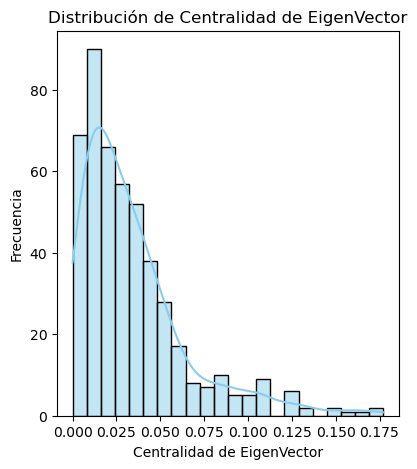

In [24]:
import seaborn as sns

eigenvector_centrality = nx.eigenvector_centrality(congress_graph)
eigenvector_values = list(eigenvector_centrality.values())
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5))

# Graficar la distribución de la centralidad de grado
plt.subplot(1, 3, 1)
sns.histplot(eigenvector_values, kde=True, color='skyblue')
plt.title('Distribución de Centralidad de EigenVector')
plt.xlabel('Centralidad de EigenVector')
plt.ylabel('Frecuencia')

Ejemplo de nodo que tiene grado de entrada 0, porque no ha interaccionado con tweets de otras personas

In [33]:
in_degree = congress_graph.in_degree(456)
out_degree = congress_graph.out_degree(456)
print(f'Grado de entrada del nodo {456}: {in_degree}')
print(f'Grado de salida del nodo {456}: {out_degree}')

Grado de entrada del nodo 456: 0
Grado de salida del nodo 456: 25


In [42]:
for node, degree in congress_graph.out_degree():
    if degree == 0:
        print(f'Nodo {node} tiene grado de salida 0')

In [41]:
for node, degree in congress_graph.in_degree():
    if degree == 0:
        print(f'Nodo {node} tiene grado de salida 0')

Nodo 31.0 tiene grado de salida 0
Nodo 227.0 tiene grado de salida 0
Nodo 240.0 tiene grado de salida 0
Nodo 356.0 tiene grado de salida 0
Nodo 434.0 tiene grado de salida 0
Nodo 456.0 tiene grado de salida 0


## Visualización familias Italianas

In [33]:
# Métricas de centralidad

degree      = pd.Series(dict(nx.degree(floren_graph)), name='degree')
eigenvector =  pd.Series(nx.eigenvector_centrality(floren_graph), name='eigenvector')
closeness    =  pd.Series(nx.closeness_centrality(floren_graph), name='closeness')
betweenness =  pd.Series(nx.betweenness_centrality(floren_graph), name='betweenness')
centralidad = pd.concat([degree, eigenvector, closeness, betweenness], axis=1)
centralidad.index.name = 'node'
centralidad.head(3)

,degree,eigenvector,closeness,betweenness
node,,,,
Acciaiuoli,1,0.132157,0.368421,0.000000
Medici,6,0.430315,0.560000,0.521978
Castellani,3,0.259020,0.388889,0.054945


In [34]:
# Top 3 nodos para cada métrica

for col in centralidad.columns:
    top_nodos = centralidad[col].sort_values(ascending=False).head(3).index.to_list()
    top_nodos.sort()
    print(f"Nodos con mayor {col}: {top_nodos}")

Nodos con mayor degree: ['Guadagni', 'Medici', 'Strozzi']
Nodos con mayor eigenvector: ['Medici', 'Ridolfi', 'Strozzi']
Nodos con mayor closeness: ['Medici', 'Ridolfi', 'Tornabuoni']
Nodos con mayor betweenness: ['Albizzi', 'Guadagni', 'Medici']


In [35]:
import networkx as nx
import netwulf as nw
import networkx.algorithms.community as nx_comm
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import itertools

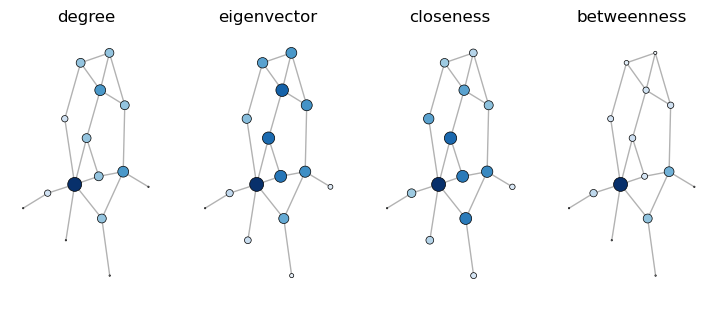

In [36]:
import matplotlib as mpl
# Representación del grafo coloreado por cada métrica de centralidad

fig, axs = plt.subplots(1, 4, figsize=(9, 3.5))

# Posición de los nodos
pos = nx.kamada_kawai_layout(floren_graph)

# Mapa de colores
cmap =  mpl.colormaps['Blues']

# Escalado de las métricas para pooder compararlas
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(centralidad)
centralidad_scaled = pd.DataFrame(
                        scaler.transform(centralidad),
                        columns=scaler.feature_names_in_
                    )
centralidad_scaled.head(3)

for i, metrica in enumerate(centralidad_scaled.columns):
    node_size = 100 * centralidad_scaled[metrica] + 1
    node_color = cmap(centralidad_scaled[metrica])
    nx.draw_networkx_nodes(
        floren_graph,
        pos=pos,
        node_size=node_size,
        node_color=node_color,
        linewidths=0.5,
        edgecolors='black',
        ax=axs[i]
    )
    nx.draw_networkx_edges(floren_graph, pos=pos, edgelist=floren_graph.edges, alpha=0.3, ax=axs[i])
    axs[i].set_title(metrica)
    axs[i].axis('off')


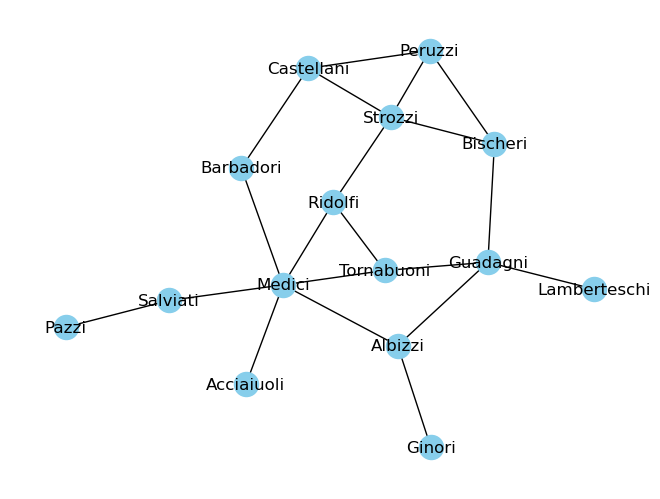

In [100]:
nx.draw(floren_graph, with_labels= True, pos=pos, node_color='skyblue')

# Extra

In [101]:
# Camino más corto entre los nodos 17 y 27
# ======================================================================================
shortest_path = nx.shortest_path(karate_graph, source=17, target=27, method='dijkstra')
shortest_path

[17, 0, 2, 27]

C:\Users\Jesus\AppData\Local\Temp\ipykernel_15908\1493346531.py:15: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(sub_graph, pos=pos, edge_color="red")


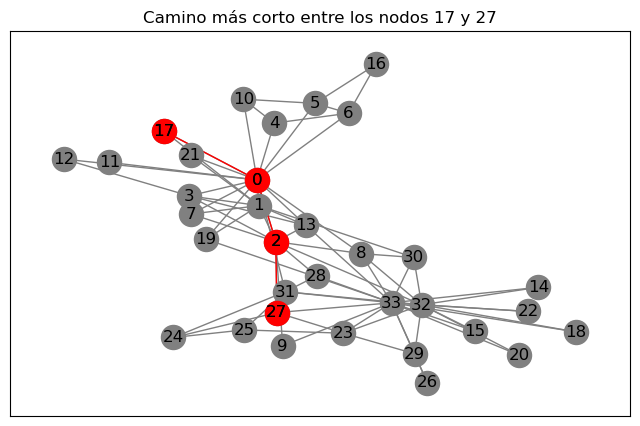

In [104]:
# Resaltar el camino más corto en el grafo
# ======================================================================================
fig, ax = plt.subplots(figsize=(8, 5))

# Crear un subgrafo con los nodos del camino más corto
sub_graph = karate_graph.subgraph(shortest_path)

# Posición de los nodos
pos = nx.spring_layout(karate_graph)

# Crear un grafo con los nodos del camino más corto en rojo y el resto en gris
nx.draw_networkx_edges(karate_graph, pos=pos, edge_color="gray")
nx.draw_networkx_nodes(karate_graph, pos=pos, node_color="gray")
nx.draw_networkx_labels(karate_graph, pos=pos, labels={node: node for node in karate_graph.nodes()})
nx.draw_networkx_edges(sub_graph, pos=pos, edge_color="red")
nx.draw_networkx_nodes(sub_graph, pos=pos, node_color="red")
nx.draw_networkx_labels(sub_graph, pos=pos, labels={node: node for node in shortest_path})
ax.set_title("Camino más corto entre los nodos 17 y 27")
plt.show();